# Scatterplot of lap times

This is an exploration of lap times, and tire types, for pre-race sessions
(practice and qualification) for the 2025 Saudi Arabia Grand Prix.

In [24]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting

# Enable Matplotlib patches for plotting timedelta values and load
# FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')

driver = 'LEC'
race = 'Jeddah'
season = 2025

In [104]:

# Get FP3 data
fp1 = fastf1.get_session(season, race, 'FP1')
fp1.load()

# Get FP3 data
fp2 = fastf1.get_session(season, race, 'FP2')
fp2.load()

# Get FP3 data
fp3 = fastf1.get_session(season, race, 'FP3')
fp3.load()

q = fastf1.get_session(season, race, 'Q')
q.load()

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
req            INFO 	Data has been written to cache!
core           INFO 	Loading data for Saudi Arabian Grand Prix - Practice 1 [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data f

In [105]:
fp1_laps = fp1.laps.pick_quicklaps().reset_index()
fp2_laps = fp2.laps.pick_quicklaps().reset_index()
fp3_laps = fp3.laps.pick_quicklaps().reset_index()
q_laps = q.laps.pick_quicklaps().reset_index()

In [37]:
print(f"fp1 is a {type(fp1)}")
print(f"fp1_laps is a {type(fp1_laps)}")

fp1 is a <class 'fastf1.core.Session'>
fp1_laps is a <class 'fastf1.core.Laps'>


In [115]:
q_laps

,index,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,1,0 days 00:18:15.003000,NOR,4,0 days 00:01:28.026000,2.0,1.0,NaT,NaT,0 days 00:00:31.966000,...,True,McLaren,0 days 00:16:46.977000,2025-04-19 17:03:30.616,1,NaN,False,,False,True
1,4,0 days 00:23:53.653000,NOR,4,0 days 00:01:27.805000,5.0,1.0,NaT,NaT,0 days 00:00:31.801000,...,True,McLaren,0 days 00:22:25.848000,2025-04-19 17:09:09.487,1,NaN,False,,False,True
2,7,0 days 00:44:42.512000,NOR,4,0 days 00:01:27.481000,8.0,2.0,NaT,NaT,0 days 00:00:31.745000,...,True,McLaren,0 days 00:43:15.031000,2025-04-19 17:29:58.670,1,NaN,False,,False,True
3,11,0 days 00:20:34.859000,PIA,81,0 days 00:01:28.019000,2.0,1.0,NaT,NaT,0 days 00:00:32.028000,...,True,McLaren,0 days 00:19:06.840000,2025-04-19 17:05:50.479,1,NaN,False,,False,True
4,14,0 days 00:29:19.789000,PIA,81,0 days 00:01:27.901000,5.0,2.0,NaT,NaT,0 days 00:00:31.901000,...,False,McLaren,0 days 00:27:51.888000,2025-04-19 17:14:35.527,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,273,0 days 00:17:17.408000,BOR,5,0 days 00:01:29.462000,2.0,1.0,NaT,NaT,0 days 00:00:32.653000,...,True,Kick Sauber,0 days 00:15:47.946000,2025-04-19 17:02:31.585,1,NaN,False,,False,True
83,276,0 days 00:22:57.412000,BOR,5,0 days 00:01:29.636000,5.0,3.0,NaT,NaT,0 days 00:00:33.052000,...,False,Kick Sauber,0 days 00:21:27.776000,2025-04-19 17:08:11.415,1,NaN,True,TRACK LIMITS AT TURN 2 LAP 6,False,True
84,281,0 days 00:18:01.147000,STR,18,0 days 00:01:29.089000,2.0,1.0,NaT,NaT,0 days 00:00:32.281000,...,True,Aston Martin,0 days 00:16:32.058000,2025-04-19 17:03:15.697,1,NaN,False,,False,True
85,284,0 days 00:23:49.240000,STR,18,0 days 00:01:28.645000,5.0,2.0,NaT,NaT,0 days 00:00:32.072000,...,True,Aston Martin,0 days 00:22:20.595000,2025-04-19 17:09:04.234,1,NaN,False,,False,True


In [107]:
print(f"FP1: {fp1_laps['LapTime'].min()}   {fp1_laps['LapTime'].max()}")
print(f"FP2: {fp2_laps['LapTime'].min()}   {fp2_laps['LapTime'].max()}")
print(f"FP3: {fp3_laps['LapTime'].min()}   {fp3_laps['LapTime'].max()}")
print(f"Q:   {q_laps['LapTime'].min()}   {q_laps['LapTime'].max()}")

FP1: 0 days 00:01:29.239000   0 days 00:01:35.483000
FP2: 0 days 00:01:28.267000   0 days 00:01:34.434000
FP3: 0 days 00:01:27.489000   0 days 00:01:33.496000
Q:   0 days 00:01:27.294000   0 days 00:01:30.829000


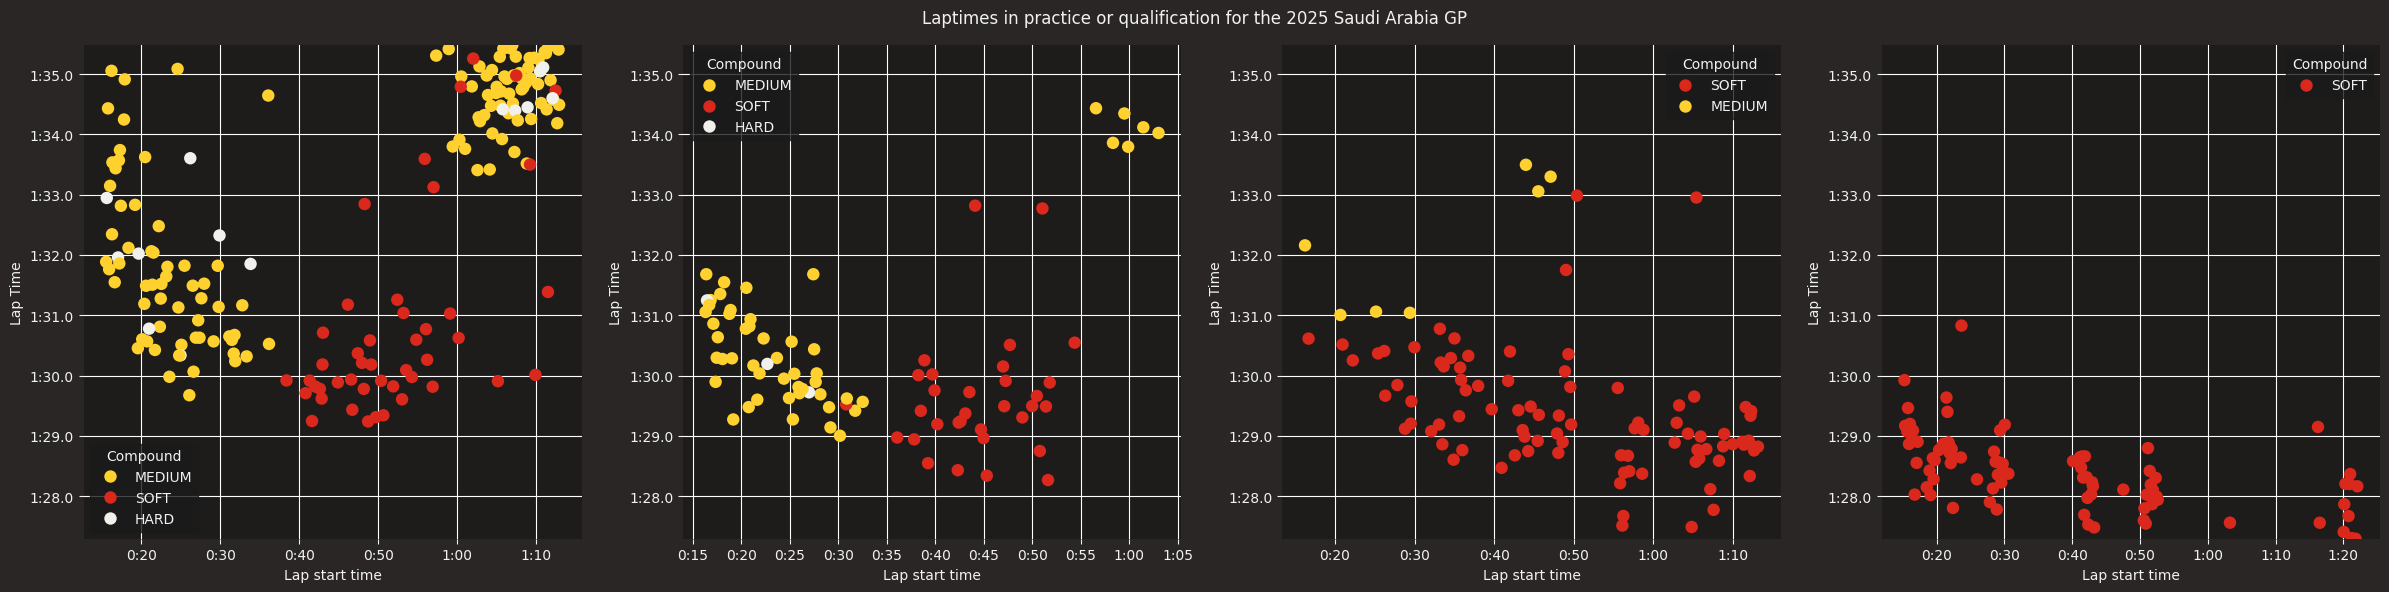

In [116]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 6))
fig.suptitle('Lap times in practice and qualification for 2025 Saudi Arabia GP')

sns.scatterplot(data=fp1_laps,
                x="LapStartTime",
                y="LapTime",
                ax=ax1,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=fp1),
                s=80,
                linewidth=0,
                legend='auto'
)

sns.scatterplot(data=fp2_laps,
                x="LapStartTime",
                y="LapTime",
                ax=ax2,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=fp2),
                s=80,
                linewidth=0,
                legend='auto'
)

sns.scatterplot(data=fp3_laps,
                x="LapStartTime",
                y="LapTime",
                ax=ax3,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=fp3),
                s=80,
                linewidth=0,
                legend='auto'
)

sns.scatterplot(data=q_laps,
                x="LapStartTime",
                y="LapTime",
                ax=ax4,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=q),
                s=80,
                linewidth=0,
                legend='auto'
)

# Set common y-axis limits
common_ylim = (fp1_laps['LapTime'].max(), q_laps['LapTime'].min())
ax1.set_ylim(common_ylim)
ax2.set_ylim(common_ylim)
ax3.set_ylim(common_ylim)
ax4.set_ylim(common_ylim)

ax1.set_xlabel("Lap start time")
ax1.set_ylabel("Lap Time")

ax2.set_xlabel("Lap start time")
ax2.set_ylabel("Lap Time")

ax3.set_xlabel("Lap start time")
ax3.set_ylabel("Lap Time")

ax4.set_xlabel("Lap start time")
ax4.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()
ax4.invert_yaxis()

plt.suptitle("Laptimes in practice or qualification for the 2025 Saudi Arabia GP")

# Turn on major grid lines
ax1.grid(color='w', which='major', axis='both')
ax2.grid(color='w', which='major', axis='both')
ax3.grid(color='w', which='major', axis='both')
ax4.grid(color='w', which='major', axis='both')

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

---

This is the end of the notebook.